# Reto 2 – Análisis de luz

**Objetivo:** Explorar cómo la luz influye sobre la biomasa y otros parámetros.

Carga el conjunto de datos y explora las variables relevantes.

In [1]:
import pandas as pd

df = pd.read_csv("../data/resultados_experimentos.csv")
df.head(10)

,sitio,temperatura,humedad,luz,biomasa
0,Bosque Alto de Nocaima,23.8,82.2,1030,250.8
1,Humedal Facatativá,18.0,89.7,395,225.8
2,Río San Francisco,17.2,85.4,647,237.5
3,Ladera de La Vega,21.7,81.4,769,252.4
4,Zona Húmeda El Vergel,24.1,85.3,1333,302.7
5,Río Subachoque,19.9,71.3,563,75.0
6,Humedal Mosquera,27.7,72.7,854,279.1
7,Río Madrid,23.6,68.0,1482,123.1
8,Reserva San Miguel,20.7,70.3,899,108.3
9,Ladera de Sasaima,19.5,82.1,1016,221.7


## Exploración inicial
Describe las columnas y analiza los tipos de datos.

In [12]:
# Exploración inicial del DataFrame
print(" Primeras filas del conjunto de datos:")
display(df.head(10))

# Información general sobre columnas y tipos de datos
print("\nℹ Información general del DataFrame:")
df.info()

# Estadísticas descriptivas para variables numéricas
print("\n Estadísticas descriptivas:")
display(df.describe())

# Análisis de valores nulos por columna
print("\n Valores nulos por columna:")
print(df.isnull().sum())

# Tipos de datos detallados
print("\n Tipos de datos por columna:")
print(df.dtypes)


 Primeras filas del conjunto de datos:


,sitio,temperatura,humedad,luz,biomasa,indice_luz,categoria_luz
0,Bosque Alto de Nocaima,23.8,82.2,1030,250.8,0.695007,alta
1,Humedal Facatativá,18.0,89.7,395,225.8,0.266532,baja
2,Río San Francisco,17.2,85.4,647,237.5,0.436572,baja
3,Ladera de La Vega,21.7,81.4,769,252.4,0.518893,baja
4,Zona Húmeda El Vergel,24.1,85.3,1333,302.7,0.899460,alta
5,Río Subachoque,19.9,71.3,563,75.0,0.379892,baja
6,Humedal Mosquera,27.7,72.7,854,279.1,0.576248,media
7,Río Madrid,23.6,68.0,1482,123.1,1.000000,alta
8,Reserva San Miguel,20.7,70.3,899,108.3,0.606613,media
9,Ladera de Sasaima,19.5,82.1,1016,221.7,0.685560,alta



ℹ Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sitio          20 non-null     object 
 1   temperatura    20 non-null     float64
 2   humedad        20 non-null     float64
 3   luz            20 non-null     int64  
 4   biomasa        20 non-null     float64
 5   indice_luz     20 non-null     float64
 6   categoria_luz  20 non-null     object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ KB

 Estadísticas descriptivas:


,temperatura,humedad,luz,biomasa,indice_luz
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,20.695000,78.090000,901.000000,196.415000,0.607962
std,3.259234,8.047615,307.177816,84.389369,0.207272
min,14.800000,63.200000,395.000000,54.800000,0.266532
25%,18.600000,72.350000,670.250000,105.650000,0.452260
50%,20.400000,76.250000,893.500000,227.050000,0.602901
75%,23.650000,82.975000,1048.000000,253.975000,0.707152
max,27.700000,93.000000,1482.000000,315.600000,1.000000



 Valores nulos por columna:
sitio            0
temperatura      0
humedad          0
luz              0
biomasa          0
indice_luz       0
categoria_luz    0
dtype: int64

 Tipos de datos por columna:
sitio             object
temperatura      float64
humedad          float64
luz                int64
biomasa          float64
indice_luz       float64
categoria_luz     object
dtype: object


## Desarrollo del reto
Aplica funciones y análisis según el objetivo. Usa `def` para definir tus funciones.

In [2]:
def indice_luz(df):
    df["indice_luz"] = df["luz"] / df["luz"].max()
    return df

# Aplicar la función al DataFrame
df = indice_luz(df)
display(df.head(10))

,sitio,temperatura,humedad,luz,biomasa,indice_luz
0,Bosque Alto de Nocaima,23.8,82.2,1030,250.8,0.695007
1,Humedal Facatativá,18.0,89.7,395,225.8,0.266532
2,Río San Francisco,17.2,85.4,647,237.5,0.436572
3,Ladera de La Vega,21.7,81.4,769,252.4,0.518893
4,Zona Húmeda El Vergel,24.1,85.3,1333,302.7,0.899460
5,Río Subachoque,19.9,71.3,563,75.0,0.379892
6,Humedal Mosquera,27.7,72.7,854,279.1,0.576248
7,Río Madrid,23.6,68.0,1482,123.1,1.000000
8,Reserva San Miguel,20.7,70.3,899,108.3,0.606613
9,Ladera de Sasaima,19.5,82.1,1016,221.7,0.685560


In [3]:
def clasificar_luz(valor, p33, p66):
    if valor < p33:
        return "baja"
    elif valor < p66:
        return "media"
    else:
        return "alta"

# Calcular percentiles
p33 = df["indice_luz"].quantile(0.33)
p66 = df["indice_luz"].quantile(0.66)

# Crear nueva columna con la categoría de luz
df["categoria_luz"] = df["indice_luz"].apply(lambda x: clasificar_luz(x, p33, p66))
display(df.head(10))

,sitio,temperatura,humedad,luz,biomasa,indice_luz,categoria_luz
0,Bosque Alto de Nocaima,23.8,82.2,1030,250.8,0.695007,alta
1,Humedal Facatativá,18.0,89.7,395,225.8,0.266532,baja
2,Río San Francisco,17.2,85.4,647,237.5,0.436572,baja
3,Ladera de La Vega,21.7,81.4,769,252.4,0.518893,baja
4,Zona Húmeda El Vergel,24.1,85.3,1333,302.7,0.899460,alta
5,Río Subachoque,19.9,71.3,563,75.0,0.379892,baja
6,Humedal Mosquera,27.7,72.7,854,279.1,0.576248,media
7,Río Madrid,23.6,68.0,1482,123.1,1.000000,alta
8,Reserva San Miguel,20.7,70.3,899,108.3,0.606613,media
9,Ladera de Sasaima,19.5,82.1,1016,221.7,0.685560,alta


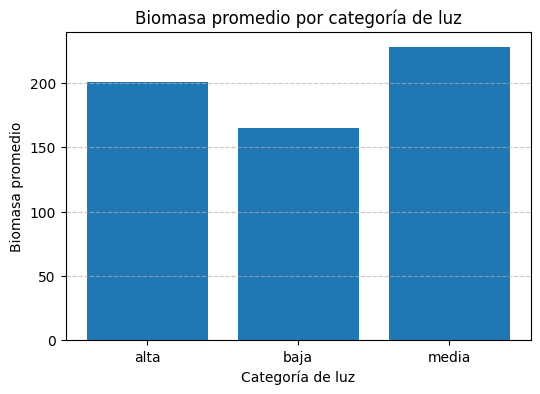

In [4]:
import matplotlib.pyplot as plt

# Calcular biomasa promedio por categoría
promedio_biomasa = df.groupby("categoria_luz")["biomasa"].mean().reset_index()

# Graficar
plt.figure(figsize=(6,4))
plt.bar(promedio_biomasa["categoria_luz"], promedio_biomasa["biomasa"])
plt.title("Biomasa promedio por categoría de luz")
plt.xlabel("Categoría de luz")
plt.ylabel("Biomasa promedio")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## Interpretación de resultados
Escribe tus observaciones y conclusiones sobre los patrones encontrados.